**Case Study 2.1**: For this case study, your task is to apply the data cleaning techniques previously covered on a modified version of the Health Insurance Dataset obtained from Kaggle (https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset). You can access the dataset in the **ENCS5141_Exp2_HealthInsurance.csv** file. This file is available in the GitHub repository hosted at https://github.com/mkjubran/ENCS5141Datasets.

In [2]:
#write you code here
import pandas as pd
import seaborn as sns
df = pd.read_csv("ENCS5141_Exp2_HealthInsurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1326 non-null   float64
 1   sex       1319 non-null   object 
 2   bmi       1321 non-null   float64
 3   children  1286 non-null   float64
 4   smoker    1321 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         12
sex         19
bmi         17
children    52
smoker      17
region       0
charges      0
dtype: int64

In [5]:
print(df.isnull().any(axis=1).sum())
print(100*df.isnull().any(axis=1).sum()/df.shape[0],'%')

111
8.295964125560538 %


In [6]:
df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges
10,25.0,NaN,26.220,0.0,no,northeast,2721.32080
11,62.0,NaN,26.290,0.0,yes,southeast,27808.72510
16,NaN,female,30.780,1.0,no,northeast,10797.33620
86,57.0,NaN,31.160,0.0,yes,northwest,43578.93940
87,56.0,NaN,27.200,0.0,no,southwest,11073.17600
...,...,...,...,...,...,...,...
1328,23.0,female,24.225,2.0,NaN,northeast,22395.74424
1329,52.0,male,38.600,2.0,NaN,southwest,10325.20600
1330,57.0,female,25.740,2.0,NaN,southeast,12629.16560
1331,23.0,female,33.400,0.0,NaN,southwest,10795.93733


In [7]:
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")
df[df.isnull().all(axis=1)]

Number of empty records = 0


,age,sex,bmi,children,smoker,region,charges


In [8]:
print(f"The number of records where gender is missing equals {df.isnull()['sex'].sum()}")
print(f"The proportion of records where gender is missing equals {100*df.isnull()['sex'].sum()/df.shape[0]}%")

The number of records where gender is missing equals 19
The proportion of records where gender is missing equals 1.4200298953662183%


In [9]:
from sklearn.preprocessing import LabelEncoder

# create a copy of the original DataFrame to mainting the original DataFrame
df_corr=df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df_corr['sex_encoded'] = label_encoder.fit_transform(df_corr['sex'])
df_corr['smoker_encoded'] = label_encoder.fit_transform(df_corr['smoker'])

# Drop categorical features
df_corr.drop(['sex','smoker'],axis=1,inplace=True)

df_corr.corr()

,age,bmi,children,charges,sex_encoded,smoker_encoded
age,1.000000,0.041396,0.047410,0.289503,0.009629,-0.024930
bmi,0.041396,1.000000,-0.014421,0.095271,0.024692,-0.009221
children,0.047410,-0.014421,1.000000,0.070550,0.005428,0.041956
charges,0.289503,0.095271,0.070550,1.000000,0.083854,0.706325
sex_encoded,0.009629,0.024692,0.005428,0.083854,1.000000,0.076778
smoker_encoded,-0.024930,-0.009221,0.041956,0.706325,0.076778,1.000000


smoker
no      8402.831144
yes    32044.335175
Name: charges, dtype: float64
smoker
no      5977.808923
yes    11553.174103
Name: charges, dtype: float64


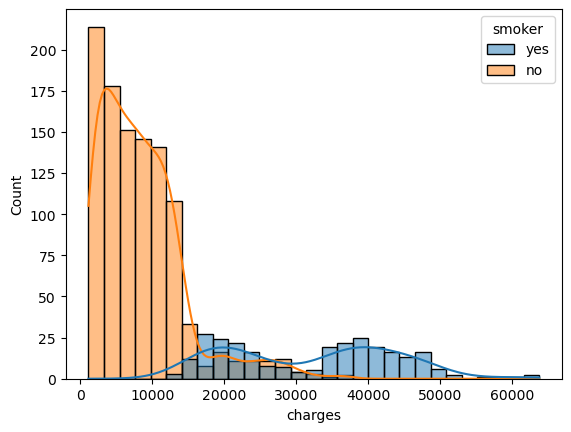

In [10]:
sns.histplot(data=df, x="charges", hue="smoker", kde=True)
#plt.xlim([135, 195])

print(df.groupby('smoker')['charges'].mean())

print(df.groupby('smoker')['charges'].std())

In [11]:
# Create a copy of the df DataFrame where the charges feature is greater or equal to 16000
df_G = df.loc[df['charges']>=16000].copy()

# Create a copy of the df DataFrame where the charges feature is less that 16000
df_L = df.loc[df['charges']<16000].copy()

# Create a copy of the df DataFrame where the charges feature is missing
df_NaN = df.loc[df['charges'].isna()].copy()

# Fill the smoker missing values in the df_G by yes
df_G['smoker'].fillna(value='yes', inplace=True)

# Fill the smoker missing values in the df_L by no
df_L['smoker'].fillna(value='no', inplace=True)

# Reconstruct the df DataFrame by concatinaing the three sub Dataframes; df_L, df_G, and df_NaN
df = pd.concat([df_L, df_G, df_NaN], axis=0)

print('The distribution of smoker categories in the DataFrame following the replacement of missing values.')
print(df.groupby('smoker')['charges'].count() / df['smoker'].shape[0])

print('\n\nInformation about the DataFrame')
print(df.isnull().sum())


The distribution of smoker categories in the DataFrame following the replacement of missing values.
smoker
no     0.792975
yes    0.207025
Name: charges, dtype: float64


Information about the DataFrame
age         12
sex         19
bmi         17
children    52
smoker       0
region       0
charges      0
dtype: int64


In [12]:
print('The distribution of smoker categories in the DataFrame following the replacement of missing values.')
print(df.groupby('smoker')['charges'].count() / df['smoker'].shape[0])

print('\n\nInformation about the DataFrame')
print(df.isnull().sum())

The distribution of smoker categories in the DataFrame following the replacement of missing values.
smoker
no     0.792975
yes    0.207025
Name: charges, dtype: float64


Information about the DataFrame
age         12
sex         19
bmi         17
children    52
smoker       0
region       0
charges      0
dtype: int64


<AxesSubplot:xlabel='charges', ylabel='age'>

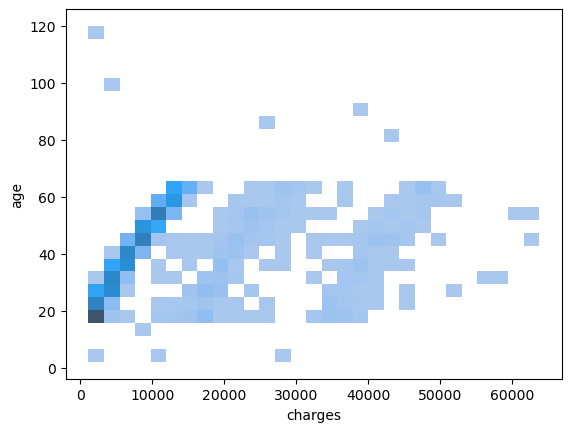

In [22]:
sns.histplot(data=df, x="charges", y="age", kde=True)
#plt.xlim([135, 195])

#print(df.groupby('age')['charges'].mean())

#print(df.groupby('age')['charges'].std())

In [23]:
print(df[['age']].isnull().any(axis=1).sum())
print(100*df[['age']].isnull().any(axis=1).sum()/df.shape[0],'%')

12
0.8968609865470852 %


In [25]:
#median

,age,sex,bmi,children,smoker,region,charges
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
6,46.0,female,33.440,1.0,no,southeast,8240.58960
...,...,...,...,...,...,...,...
1318,35.0,male,39.710,NaN,no,northeast,19496.71917
1321,62.0,male,26.695,NaN,yes,northeast,28101.33305
1323,42.0,female,40.370,NaN,yes,southeast,43896.37630
1328,23.0,female,24.225,2.0,yes,northeast,22395.74424


In [26]:
df.dropna(subset=['age'], inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
6,46.0,female,33.440,1.0,no,southeast,8240.58960
...,...,...,...,...,...,...,...
1318,35.0,male,39.710,NaN,no,northeast,19496.71917
1321,62.0,male,26.695,NaN,yes,northeast,28101.33305
1323,42.0,female,40.370,NaN,yes,southeast,43896.37630
1328,23.0,female,24.225,2.0,yes,northeast,22395.74424


In [27]:
print(df.isnull().sum())

age          0
sex         19
bmi         17
children    52
smoker       0
region       0
charges      0
dtype: int64


In [29]:
print(df[['bmi']].isnull().any(axis=1).sum())
print(100*df[['bmi']].isnull().any(axis=1).sum()/df.shape[0],'%')

17
1.2820512820512822 %


In [33]:
x= df['children'].median()
x

1.0

In [34]:
df['children'].fillna(value=x, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
6,46.0,female,33.440,1.0,no,southeast,8240.58960
...,...,...,...,...,...,...,...
1318,35.0,male,39.710,1.0,no,northeast,19496.71917
1321,62.0,male,26.695,1.0,yes,northeast,28101.33305
1323,42.0,female,40.370,1.0,yes,southeast,43896.37630
1328,23.0,female,24.225,2.0,yes,northeast,22395.74424


In [35]:
print(df.isnull().sum())

age          0
sex         19
bmi         17
children     0
smoker       0
region       0
charges      0
dtype: int64


In [37]:
print(df[['sex']].isnull().any(axis=1).sum())
print(100*df[['sex']].isnull().any(axis=1).sum()/df.shape[0],'%')

19
1.4328808446455505 %


In [38]:
df.dropna(subset=['sex'], inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
6,46.0,female,33.440,1.0,no,southeast,8240.58960
...,...,...,...,...,...,...,...
1318,35.0,male,39.710,1.0,no,northeast,19496.71917
1321,62.0,male,26.695,1.0,yes,northeast,28101.33305
1323,42.0,female,40.370,1.0,yes,southeast,43896.37630
1328,23.0,female,24.225,2.0,yes,northeast,22395.74424


In [39]:
print(df[['bmi']].isnull().any(axis=1).sum())
print(100*df[['bmi']].isnull().any(axis=1).sum()/df.shape[0],'%')

17
1.3006885998469777 %


In [40]:
print(df.isnull().sum())

age          0
sex          0
bmi         17
children     0
smoker       0
region       0
charges      0
dtype: int64


In [41]:
df.dropna(subset=['bmi'], inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
6,46.0,female,33.440,1.0,no,southeast,8240.58960
...,...,...,...,...,...,...,...
1318,35.0,male,39.710,1.0,no,northeast,19496.71917
1321,62.0,male,26.695,1.0,yes,northeast,28101.33305
1323,42.0,female,40.370,1.0,yes,southeast,43896.37630
1328,23.0,female,24.225,2.0,yes,northeast,22395.74424


In [42]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
